<a href="https://colab.research.google.com/github/Nadezda-Sut/statistics_in_science/blob/main/Disser_Logistic%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: Master Python for scientific programming by solving projects
## PROJECT: Statistics
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/maspy_x/?couponCode=202201

In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# Download and inspect the data

In [2]:
#link google colab and google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# path to file in google drive

file_path = "/content/gdrive/My Drive/delite/beta/eeg.csv"
data = pd.read_csv(file_path)
data

,№,И.Ф.,"Фамилия, имя",Интернет ответ,Интернет время,Возраст,Пол,Time-test: Среднее 1 1,"Time-test: Среднее время реакции, серия 1 (Часть 2)","Time-test: Среднее время реакции, серия 2 (Часть 1)",...,Modularity(Posle_8-12),Global Efficiency(Posle_8-12),Local Efficiency(Posle_8-12),Global Connectivity Index(Posle_8-12),Network Density(Posle_8-12),Clustering Coefficient(Posle_8-12),Average Path Length(Posle_8-12),Node Strength(Posle_8-12),Node Betweenness Centrality(Posle_8-12),Assortativity(Posle_8-12)
0,1,Иванова Елена,ИЕ,0,30,13,0,280.1,288.1,363.3,...,0.057000,0.812000,0.858000,0.195000,0.307000,0.716000,1.379000,726.933000,0.39200,-0.218000
1,3,Микляев Владимир,МВ,1,291,13,1,223.3,273.5,334.4,...,0.017000,0.952000,0.953000,0.270000,0.445000,0.907000,1.096000,1005.789000,0.09900,-0.048000
2,5,Щипина Злата,ЩЗ,1,420,13,0,291.8,288.0,341.4,...,0.202000,0.583000,0.727000,0.118000,0.098000,0.570000,1.991000,440.934000,1.02700,-0.388000
3,6,Калинченко Василий,КВ,0,310,12,1,314.5,338.0,420.2,...,0.099000,0.763000,0.831000,0.163000,0.259000,0.661000,1.473000,604.970000,0.48900,-0.184000
4,7,Ивашин Максим,ИМ,0,36,11,1,307.9,282.3,258.7,...,0.067000,0.874000,0.893000,0.239000,0.368000,0.785000,1.251000,889.655000,0.26000,-0.105000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,67,Елисеева Марианна,Ели Мар,0,65,14,0,280.2,342.6,322.0,...,0.149000,0.694000,0.715000,0.144000,0.192000,0.449000,1.620000,536.625000,0.64100,-0.178000
58,68,Григорьев Алексей,Гри Але,0,55,14,1,292.3,278.4,353.9,...,0.095000,0.844000,0.864000,0.199000,0.338000,0.728000,1.312000,739.035000,0.32300,-0.119000
59,69,Полозаев Богдан,Пол Бог,1,182,15,1,341.2,300.4,434.3,...,0.069000,0.807000,0.841000,0.180000,0.302000,0.682000,1.386000,668.913000,0.39900,-0.093000
60,70,Крылов Ярослав,Кры Яро,0,572,10,1,334.8,355.1,507.5,...,0.022000,0.907000,0.909000,0.228000,0.400000,0.818000,1.187000,849.703000,0.19300,-0.100000


In [ ]:
# describe the data

data.describe()

,№,Возраст,Пол,Интернет ответ,Интернет время,Time-test: Среднее 1 1,"Time-test: Среднее время реакции, серия 1 (Часть 2)","Time-test: Среднее время реакции, серия 2 (Часть 1)","Time-test: Среднее время реакции, серия 2 (Часть 2)",Time-test: Проп 1 1,...,Global Connectivity Index,Network Density,Clustering Coefficient,Average Path Length,Modularity (POSLE),Global Efficiency.1,Global Connectivity Index.1,Network Density.1,Clustering Coefficient.1,Average Path Length.1
count,64.000000,64.000000,64.0000,64.0000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,39.031250,13.281250,0.5625,0.4375,197.734375,298.882812,306.900000,382.045313,393.806250,1.53125,...,0.194482,0.150265,0.489316,1.815497,0.184188,0.640993,0.193683,0.149671,0.502720,1.862813
std,20.423274,2.126692,0.5000,0.5000,164.791474,28.597195,31.914887,39.262486,49.380948,2.14527,...,0.046735,0.092509,0.133955,0.371774,0.112814,0.110258,0.043900,0.090991,0.135110,0.437333
min,1.000000,9.000000,0.0000,0.0000,30.000000,223.300000,238.400000,258.700000,261.800000,0.00000,...,0.090304,0.001913,0.167227,1.236158,0.053443,0.396146,0.106757,0.013934,0.130340,1.353594
25%,22.750000,11.000000,0.0000,0.0000,60.000000,275.850000,286.900000,359.275000,360.450000,0.00000,...,0.169147,0.081694,0.412465,1.563074,0.103182,0.572891,0.160004,0.071858,0.432144,1.531780
50%,39.500000,13.500000,1.0000,0.0000,141.000000,296.450000,303.650000,384.000000,391.950000,1.00000,...,0.192207,0.142350,0.493001,1.744142,0.155946,0.635238,0.185965,0.131421,0.516572,1.803571
75%,55.500000,15.000000,1.0000,1.0000,294.750000,314.200000,322.575000,395.925000,418.675000,2.00000,...,0.224046,0.217145,0.578529,1.994887,0.245052,0.739413,0.233410,0.236680,0.600335,1.987700
max,77.000000,17.000000,1.0000,1.0000,572.000000,366.900000,424.400000,507.500000,535.400000,10.00000,...,0.310306,0.369399,0.786936,3.592742,0.504597,0.823203,0.279551,0.303552,0.844050,3.378151


In [4]:
# variable names

data.keys()

Index(['№', 'И.Ф.', 'Фамилия, имя', 'Интернет ответ', 'Интернет время',
       'Возраст', 'Пол', 'Time-test: Среднее 1 1',
       'Time-test: Среднее время реакции, серия 1 (Часть 2)',
       'Time-test: Среднее время реакции, серия 2 (Часть 1)',
       'Time-test: Среднее время реакции, серия 2 (Часть 2)',
       'Time-test: Проп 1 1',
       'Time-test: Количество пропусков, серия 1 (Часть 2)',
       'Time-test: Количество пропусков, серия 2 (Часть 1)',
       'Time-test: Количество пропусков, серия 2 (Часть 2)',
       'Time-test: Ош 2 1', 'Time-test: Количество ошибок, серия 2 (Часть 2) ',
       'WMem: Количество объектов, серия 1',
       'WMem: Количество объектов, серия 2',
       'WMem: Количество объектов, серия 3', 'WMem: Время серии 1',
       'WMem: Время серии 2', 'WMem: Время серии 3', 'Забывание ', 'Обучение',
       'Количество фиксаций до области интереса (Чтение инструкции)',
       'Время до первой фиксации\n',
       'Время фиксации на области интереса (тексте)',


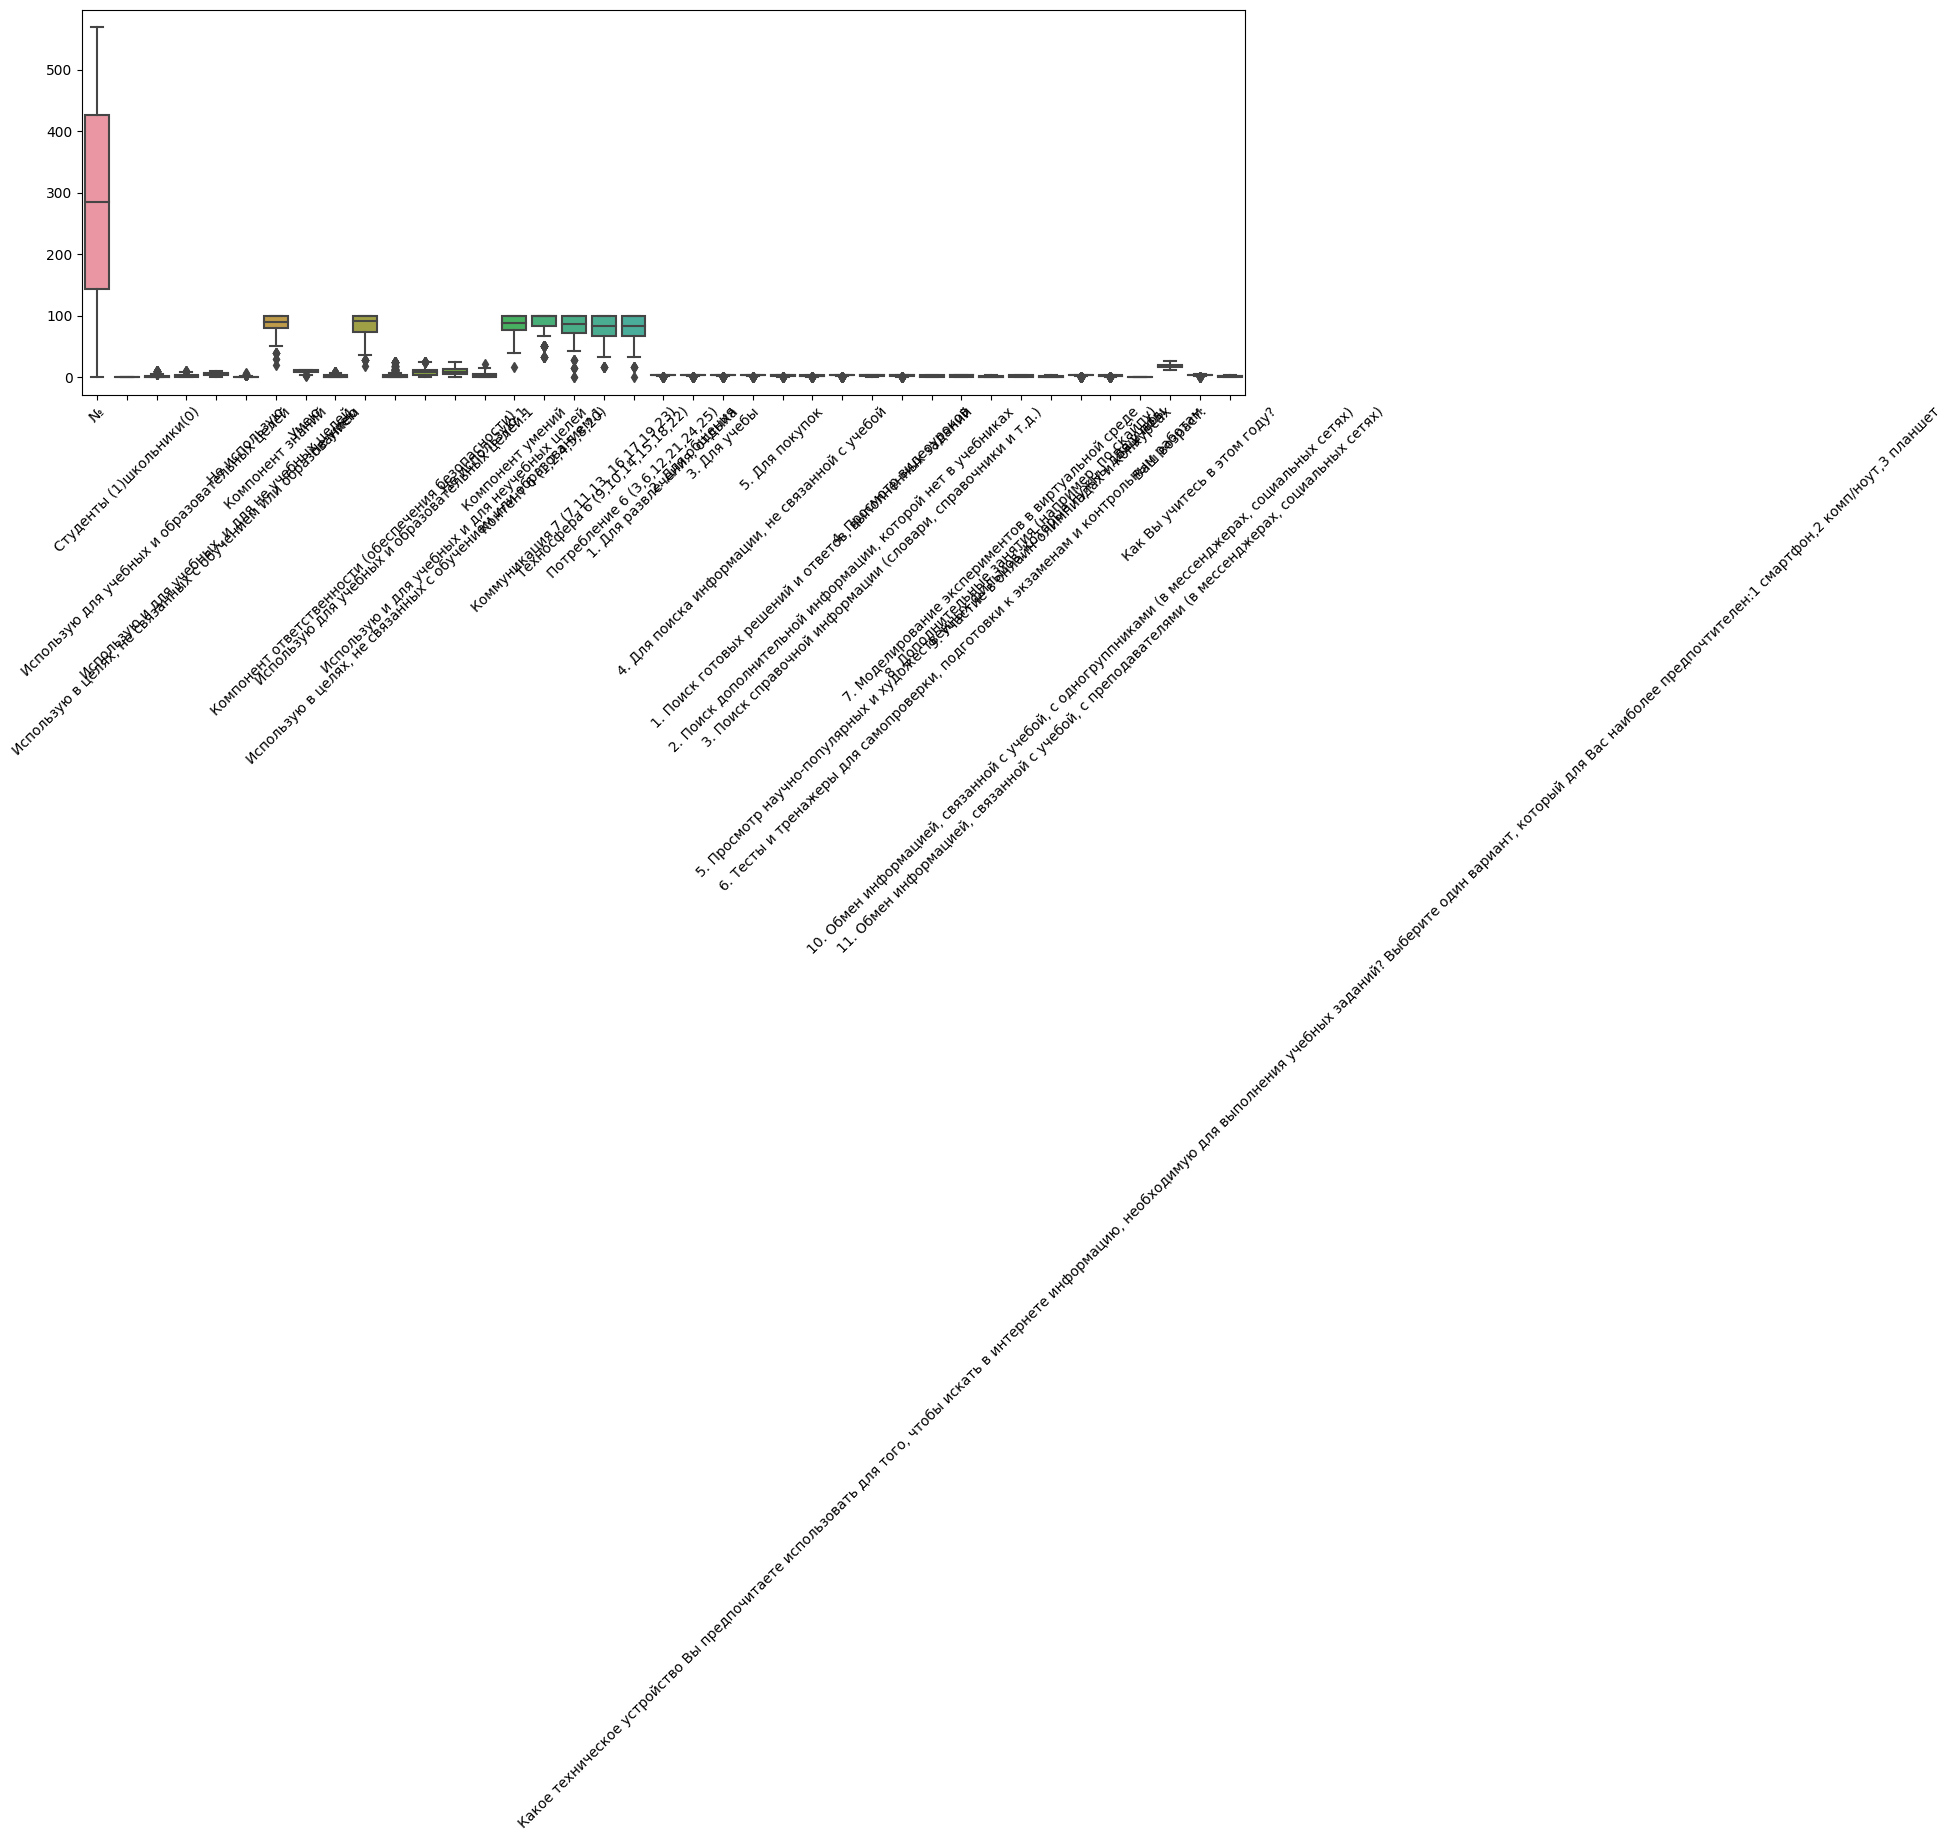

In [ ]:
fig,ax = plt.subplots(1,figsize=(15,5))

ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

# Logistic regression

In [5]:
import statsmodels.api as sm

In [6]:
# binarize phone_1/comp_0 (the subject used a computer or telephone)
# binarization threshold

binthresh = np.mean(data['Интернет ответ'])

# 'binquality' column with Boolean type True or False

data['binquality'] = data[ 'Интернет ответ'] > binthresh
data


,№,И.Ф.,"Фамилия, имя",Интернет ответ,Интернет время,Возраст,Пол,Time-test: Среднее 1 1,"Time-test: Среднее время реакции, серия 1 (Часть 2)","Time-test: Среднее время реакции, серия 2 (Часть 1)",...,Global Efficiency(Posle_8-12),Local Efficiency(Posle_8-12),Global Connectivity Index(Posle_8-12),Network Density(Posle_8-12),Clustering Coefficient(Posle_8-12),Average Path Length(Posle_8-12),Node Strength(Posle_8-12),Node Betweenness Centrality(Posle_8-12),Assortativity(Posle_8-12),binquality
0,1,Иванова Елена,ИЕ,0,30,13,0,280.1,288.1,363.3,...,0.812000,0.858000,0.195000,0.307000,0.716000,1.379000,726.933000,0.39200,-0.218000,False
1,3,Микляев Владимир,МВ,1,291,13,1,223.3,273.5,334.4,...,0.952000,0.953000,0.270000,0.445000,0.907000,1.096000,1005.789000,0.09900,-0.048000,True
2,5,Щипина Злата,ЩЗ,1,420,13,0,291.8,288.0,341.4,...,0.583000,0.727000,0.118000,0.098000,0.570000,1.991000,440.934000,1.02700,-0.388000,True
3,6,Калинченко Василий,КВ,0,310,12,1,314.5,338.0,420.2,...,0.763000,0.831000,0.163000,0.259000,0.661000,1.473000,604.970000,0.48900,-0.184000,False
4,7,Ивашин Максим,ИМ,0,36,11,1,307.9,282.3,258.7,...,0.874000,0.893000,0.239000,0.368000,0.785000,1.251000,889.655000,0.26000,-0.105000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,67,Елисеева Марианна,Ели Мар,0,65,14,0,280.2,342.6,322.0,...,0.694000,0.715000,0.144000,0.192000,0.449000,1.620000,536.625000,0.64100,-0.178000,False
58,68,Григорьев Алексей,Гри Але,0,55,14,1,292.3,278.4,353.9,...,0.844000,0.864000,0.199000,0.338000,0.728000,1.312000,739.035000,0.32300,-0.119000,False
59,69,Полозаев Богдан,Пол Бог,1,182,15,1,341.2,300.4,434.3,...,0.807000,0.841000,0.180000,0.302000,0.682000,1.386000,668.913000,0.39900,-0.093000,True
60,70,Крылов Ярослав,Кры Яро,0,572,10,1,334.8,355.1,507.5,...,0.907000,0.909000,0.228000,0.400000,0.818000,1.187000,849.703000,0.19300,-0.100000,False


In [7]:
# create a list containing columns to use in regression
# this is all the columns except for dependent variable and binquality



xcols = []


for key in data.keys():
  if key in [
      #'Возраст', 'Пол',
       #'Time-test: Среднее 1 1',
       'Time-test: Среднее время реакции, серия 1 (Часть 2)',
       #'Time-test: Среднее время реакции, серия 2 (Часть 1)',
       'Time-test: Среднее время реакции, серия 2 (Часть 2)',
       #'Time-test: Проп 1 1',
       'Time-test: Количество пропусков, серия 1 (Часть 2)',
       #'Time-test: Количество пропусков, серия 2 (Часть 1)',
       'Time-test: Количество пропусков, серия 2 (Часть 2)',
       'Time-test: Ош 2 1', 'Time-test: Количество ошибок, серия 2 (Часть 2) ',
       'WMem: Количество объектов, серия 1',
       'WMem: Количество объектов, серия 2',
       'WMem: Количество объектов, серия 3',
       'WMem: Время серии 1',
       'WMem: Время серии 2', 'WMem: Время серии 3',
       #'Забывание ', 'Обучение',
       #'Количество фиксаций до области интереса (Чтение инструкции)',
       #'Время до первой фиксации\n',
       #'Время фиксации на области интереса (тексте)',
       'Длительность первой фиксации на области интереса',
       #'Число возвратов в область',
       'Среднее время фиксации', 'Все фиксации',
       #'Амплитуда саккады', 'Количество саккад', 'Средняя скорость саккады',
       'Modularity (Do_13-30)',
       'Global Efficiency(Do_13-30)',
       #'Local Efficiency(Do_13-30)', 'Global Connectivity Index(Do_13-30)',
       #'Network Density(Do_13-30)', 'Clustering Coefficient(Do_13-30)',
       #'Average Path Length(Do_13-30)',
       #'Node Strength(Do_13-30)',
       #'Node Betweenness Centrality(Do_13-30)', 'Assortativity(Do_13-30)',
       'Modularity(Posle_13-30)',
       'Global Efficiency(Posle_13-30)',
       #'Local Efficiency(Posle_13-30)',
       #'Global Connectivity Index(Posle_13-30)',
       #'Network Density(Posle_13-30)',
       #'Clustering Coefficient(Posle_13-30)',
       #'Average Path Length(Posle_13-30)',
       #'Node Strength(Posle_13-30)',
       #'Node Betweenness Centrality(Posle_13-30)',
       #'Assortativity(Posle_13-30)',
       'Modularity(Do_8-12)',
       'Global Efficiency(Do_8-12)',
       #'Local Efficiency(Do_8-12)',
       #'Global Connectivity Index(Do_8-12)', 'Network Density(Do_8-12)',
       #'Clustering Coefficient(Do_8-12)',
       #'Average Path Length(Do_8-12)',
       #'Node Strength(Do_8-12)', 'Node Betweenness Centrality(Do_8-12)',
       #'Assortativity(Do_8-12)',
       'Modularity(Posle_8-12)',
       'Global Efficiency(Posle_8-12)',
       #'Local Efficiency(Posle_8-12)',
       #'Global Connectivity Index(Posle_8-12)', 'Network Density(Posle_8-12)',
       #'Clustering Coefficient(Posle_8-12)',
       #'Average Path Length(Posle_8-12)',
       #'Node Strength(Posle_8-12)',
       #'Node Betweenness Centrality(Posle_8-12)',
       #'Assortativity(Posle_8-12)'
       ]:
                     xcols.append(key)

xcols

['Time-test: Среднее время реакции, серия 1 (Часть 2)',
 'Time-test: Среднее время реакции, серия 2 (Часть 2)',
 'Time-test: Количество пропусков, серия 1 (Часть 2)',
 'Time-test: Количество пропусков, серия 2 (Часть 2)',
 'Time-test: Ош 2 1',
 'Time-test: Количество ошибок, серия 2 (Часть 2) ',
 'WMem: Количество объектов, серия 1',
 'WMem: Количество объектов, серия 2',
 'WMem: Количество объектов, серия 3',
 'WMem: Время серии 1',
 'WMem: Время серии 2',
 'WMem: Время серии 3',
 'Длительность первой фиксации на области интереса',
 'Среднее время фиксации',
 'Все фиксации',
 'Modularity (Do_13-30)',
 'Global Efficiency(Do_13-30)',
 'Modularity(Posle_13-30)',
 'Global Efficiency(Posle_13-30)',
 'Modularity(Do_8-12)',
 'Global Efficiency(Do_8-12)',
 'Modularity(Posle_8-12)',
 'Global Efficiency(Posle_8-12)']

In [8]:
# setup and run the logistic regression model
model = sm.Logit(data['binquality'],data[xcols])
results = model.fit(method='newton')

# have a look at the results!
results.summary()

Optimization terminated successfully.
         Current function value: 0.387289
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             binquality   No. Observations:                   62
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                           22
Date:                Wed, 15 May 2024   Pseudo R-squ.:                  0.4344
Time:                        21:33:11   Log-Likelihood:                -24.012
converged:                       True   LL-Null:                       -42.458
Covariance Type:            nonrobust   LLR p-value:                   0.02431
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Time-test: Среднее время реакции, серия 1 (Часть 2)    -0.0277      0.025     -1.119      0.263      -0.076       0.021
Time-test: Среднее время реакции, серия 2 (Часть 2)    -0.0233      0.016     -1.425      0.154      -0.055       0.009
Time-test: Количество пропусков, серия 1 (Часть 2)      1.0169      0.388      2.620      0.009       0.256       1.777
Time-test: Количество пропусков, серия 2 (Часть 2)     -0.6072      0.229     -2.649      0.008      -1.057      -0.158
Time-test: Ош 2 1                                      -0.4462      0.230     -1.936      0.053      -0.898       0.006
Time-test: Количество ошибок, серия 2 (Часть 2)         0.2765      0.206      1.344      0.179      -0.127       0.680
WMem: Количество объектов, серия 1                     -0.1426      0.164     -0.871      0.384      -0.463       0.178
WMem: Количество объектов, серия 2                      0.5636      0.267      2.108      0.035       0.040       1.088
WMem: Количество объектов, серия 3                      0.8203      0.309      2.655      0.008       0.215       1.426
WMem: Время серии 1                                  1.684e-06   1.54e-05      0.109      0.913   -2.86e-05    3.19e-05
WMem: Время серии 2                                 -8.026e-05   3.52e-05     -2.282      0.022      -0.000   -1.13e-05
WMem: Время серии 3                                 -7.084e-05   3.25e-05     -2.177      0.029      -0.000   -7.06e-06
Длительность первой фиксации на области интереса       -1.8646      2.021     -0.922      0.356      -5.827       2.097
Среднее время фиксации                                  6.7298      3.098      2.172      0.030       0.657      12.803
Все фиксации                                            0.0101      0.006      1.774      0.076      -0.001       0.021
Modularity (Do_13-30)                                 -23.3692     12.589     -1.856      0.063     -48.044       1.305
Global Efficiency(Do_13-30)                           -52.0093     20.510     -2.536      0.011     -92.208     -11.810
Modularity(Posle_13-30)                                 7.8752      8.324      0.946      0.344      -8.440      24.191
Global Efficiency(Posle_13-30)                         14.5609     12.322      1.182      0.237      -9.590      38.712
Modularity(Do_8-12)                                   -27.0450     34.963     -0.774      0.439     -95.572      41.482
Global Efficiency(Do_8-12)                            -20.5341     20.525     -1.000      0.317     -60.762      19.693
Modularity(Posle_8-12)                                109.0755     46.751      2.333      0.020      17.445     200.706
Global Efficiency(Posle_8-12)                          60.4852     26.457      2.286      0.022       8.631     112.339
=======================================================================================================================
"

In [ ]:
from IPython.display import display, HTML

In [ ]:
# Get the coefficients
coefficients = results.params

# Calculate the odds ratios by exponentiating the coefficients
odds_ratios = np.exp(coefficients)

# Create a DataFrame to display the odds ratios with corresponding variable names
odds_ratios_df = pd.DataFrame({'Variable': coefficients.index, 'Odds Ratio': odds_ratios.values})

# Display the odds ratios
#print(odds_ratios_df)
display(HTML(odds_ratios_df.to_html()))


,Variable,Odds Ratio
0,Крит.стиль,0.869620
1,Упр.стиль,0.998693
2,Практ.стиль,0.873523
3,Обуч.,0.873422
4,Р.уч.акт.,0.942299
5,Техносфера,0.982197
6,Коммуникация,1.021501
7,Потребление,1.002313
8,2. Для общения,0.768457
9,3. Для учебы,1.761264


In [9]:
! pip install matplotlib seaborn pandas


<ipython-input-10-46a9d2a73644>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data['Интернет ответ'], y=data['Time-test: Количество пропусков, серия 1 (Часть 2)'], palette="Set2")
<ipython-input-10-46a9d2a73644>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data['Интернет ответ'], y=data['Time-test: Количество пропусков, серия 2 (Часть 2)'], palette="Set2")
<ipython-input-10-46a9d2a73644>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data['Интернет ответ'], y=data['Time-test: Ош 2 1'], palette="Set2")


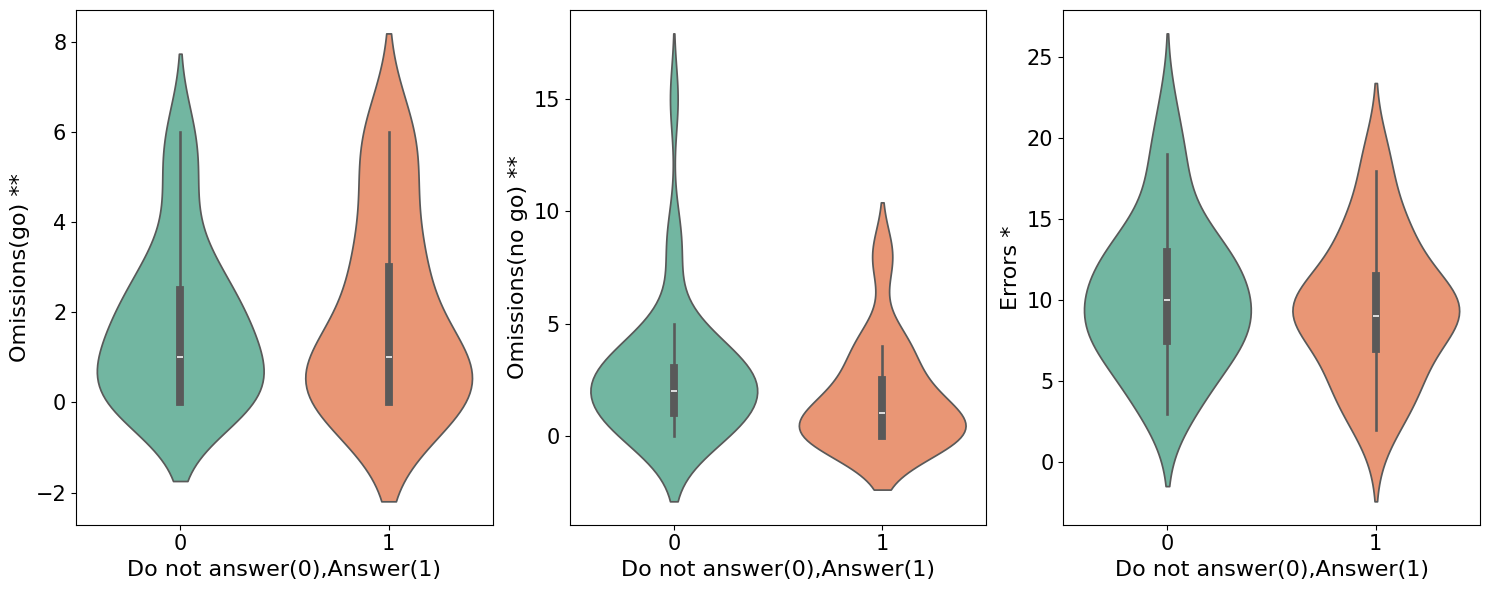

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' contains your dataset
font_size = 15
axis_title_font = {'fontsize': 16}
plt.figure(figsize=(15, 6))


# Second Plot
plt.subplot(1, 3, 1)
sns.violinplot(x=data['Интернет ответ'], y=data['Time-test: Количество пропусков, серия 1 (Часть 2)'], palette="Set2")
#plt.title("Violin Plot of Knowledge Component")
plt.xlabel("Do not answer(0),Answer(1)", fontdict=axis_title_font)
plt.ylabel('Omissions(go) **', fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size

# Third Plot
plt.subplot(1, 3, 2)
sns.violinplot(x=data['Интернет ответ'], y=data['Time-test: Количество пропусков, серия 2 (Часть 2)'], palette="Set2")
#plt.title("Violin Plot of Skills Component")
plt.xlabel("Do not answer(0),Answer(1)", fontdict=axis_title_font)
plt.ylabel('Omissions(no go) **', fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size


# First Plot
plt.subplot(1, 3, 3)
sns.violinplot(x=data['Интернет ответ'], y=data['Time-test: Ош 2 1'], palette="Set2")
#plt.title("Violin Plot of Security Responsibility Component")
plt.xlabel("Do not answer(0),Answer(1)", fontdict=axis_title_font)
plt.ylabel('Errors *', fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size





plt.tight_layout()
plt.show()





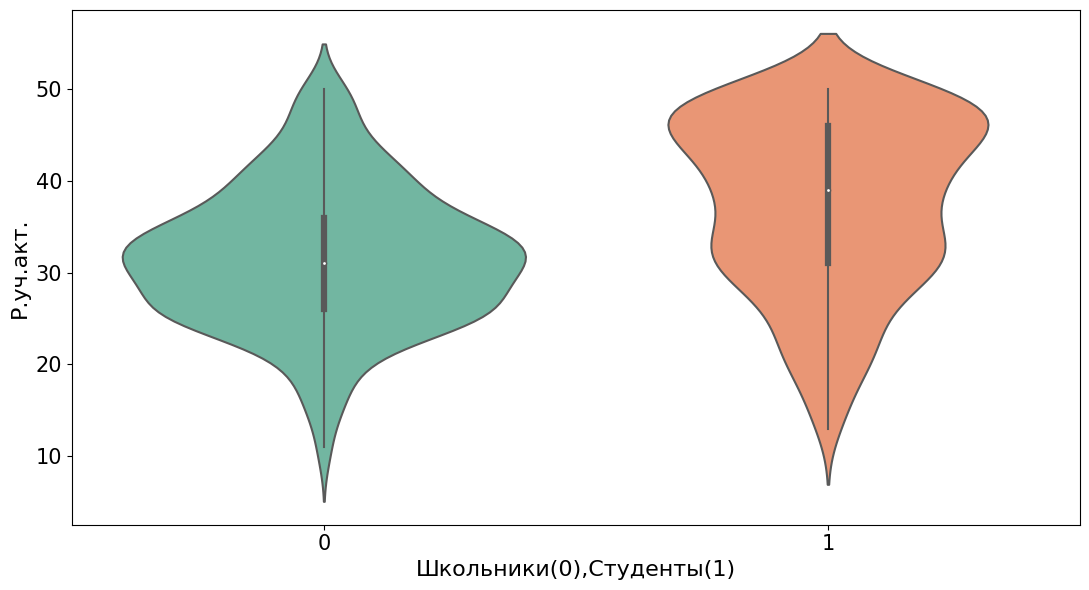

In [ ]:
# Assuming 'data' contains your dataset
font_size = 15
axis_title_font = {'fontsize': 16}
plt.figure(figsize=(11, 6))


# Second Plot
plt.subplot(1, 1, 1)
sns.violinplot(x=data['Студенты/школьники'], y=data['Р.уч.акт.'], palette="Set2")
#plt.title("Violin Plot of Knowledge Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel('Р.уч.акт.', fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size



plt.tight_layout()
plt.show()

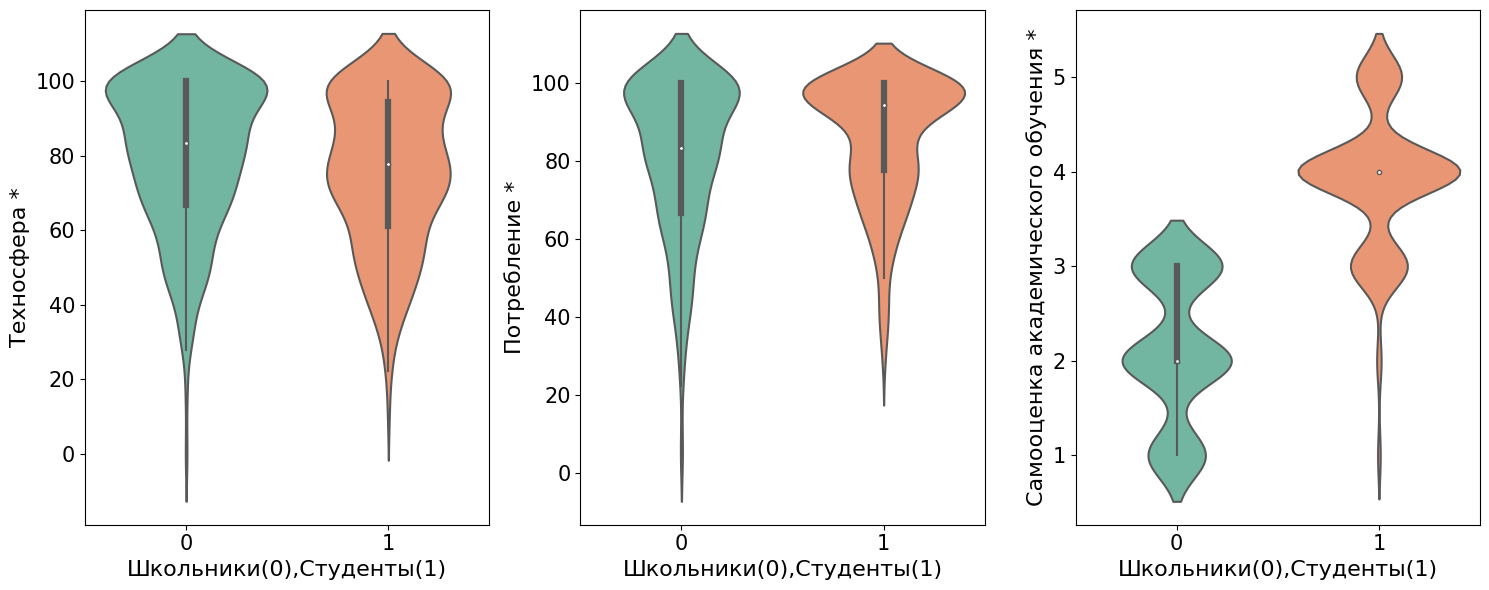

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' contains your dataset
font_size = 15
axis_title_font = {'fontsize': 16}
plt.figure(figsize=(15, 6))

# First Plot
plt.subplot(1, 3, 1)
sns.violinplot(x=data['Студенты/школьники'], y=data['Техносфера'], palette="Set2")
#plt.title("Violin Plot of Knowledge Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel('Техносфера *', fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size

# Second Plot
plt.subplot(1, 3, 2)
sns.violinplot(x=data['Студенты/школьники'], y=data['Потребление'], palette="Set2")
#plt.title("Violin Plot of Security Responsibility Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel('Потребление *', fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size

# Third Plot
plt.subplot(1, 3, 3)
sns.violinplot(x=data['Студенты/школьники'], y=data['Оценки в этом году'], palette="Set2")
#plt.title("Violin Plot of Skills Component")
plt.xlabel("Школьники(0),Студенты(1)", fontdict=axis_title_font)
plt.ylabel('Самооценка академического обучения *', fontdict=axis_title_font)
plt.xticks(fontsize=font_size)  # Set tick label font size
plt.yticks(fontsize=font_size)  # Set tick label font size


plt.tight_layout()
plt.show()


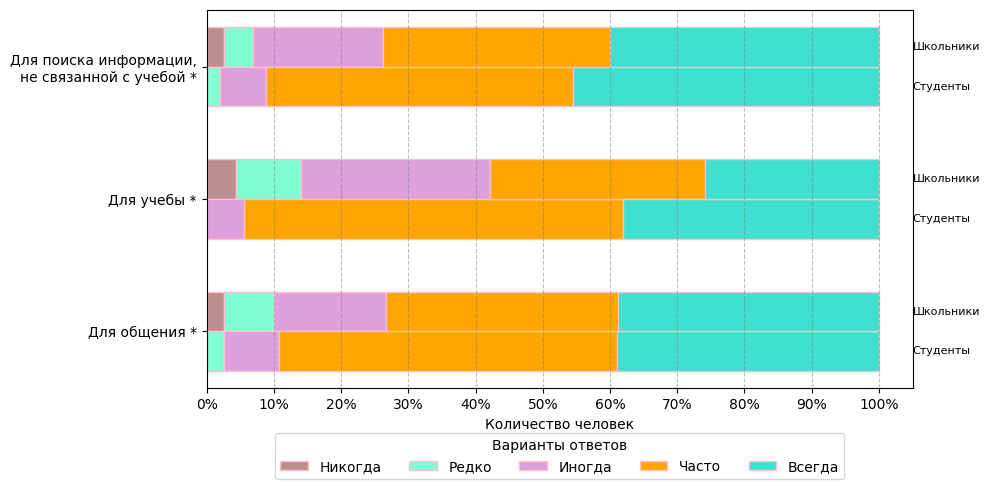

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
activities = [
     'Для общения *',
     'Для учебы *',
     "Для поиска информации,\nне связанной с учебой *"

]

response_labels = ["Никогда", "Редко", "Иногда", "Часто", "Всегда"]
response_colors = ["rosybrown", "aquamarine", "plum", "orange", "turquoise"]

responses_students = np.array([
    [0.00, 2.62, 8.20, 50.16, 39.02],
    [0.00, 0.00, 5.57, 56.39, 38.03],
    [0.00, 1.97, 6.89, 45.57, 45.57],
])

responses_schoolchildren = np.array([
    [2.52, 7.55, 16.55, 34.53, 38.85],
    [4.32, 9.71, 28.06, 32.01, 25.90],
    [2.52, 4.32, 19.42, 33.81, 39.93],
])

y = np.arange(len(activities))  # the label locations
height = 0.30 # adjust the height to reduce the space between activity labels
border_color = "pink"  # color for the border of each bar

fig, ax = plt.subplots(figsize=(10, 5))  # Adjust the figsize here (e.g., figsize=(8, 10))

for i, color in enumerate(response_colors):
    left1 = np.sum(responses_students[:, :i], axis=1)
    left2 = np.sum(responses_schoolchildren[:, :i], axis=1)

    rects1 = ax.barh(y - height/2, responses_students[:, i], height, left=left1, label=response_labels[i], color=color, edgecolor=border_color)
    rects2 = ax.barh(y + height/2, responses_schoolchildren[:, i], height, left=left2, color=color, edgecolor=border_color)

ax.set_xlabel('Количество человек')
#ax.set_title('Распределение ответов по группам и активностям')
ax.set_yticks(y)
ax.set_yticklabels(activities)
ax.set_xticks(np.linspace(0, 100, 11))
ax.set_xticklabels(["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"])

for percent in np.linspace(0, 100, 11):
    ax.axvline(x=percent, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)


#ax.set_xticks(np.arange(0, 101, 20))
#ax.set_xticklabels(["0%", "20%", "40%", "60%", "80%", "100%"])
#ax.legend(title="Уровень активности")
legend = ax.legend(title="Уровень активности",
                   bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=5)

# Add labels on the side near bars
for j in range(len(activities)):
    ax.text(105, y[j] - height/2, "Студенты", ha='left', va='center', color='black', fontsize=8)
    ax.text(105, y[j] + height/2, "Школьники", ha='left', va='center', color='black', fontsize=8)

# Adjust the bbox_to_anchor parameter to bring the legend title closer
legend = ax.legend(title="Варианты ответов",
                   bbox_to_anchor=(0.5, -0.1), loc="upper center", ncol=5)


fig.tight_layout()

plt.show()


In [ ]:
# Define the binary variable
binary_variable = 'Студенты/школьники'

# Define the Likert scale variables you want to analyze
likert_scale_variables = [
     '2. Для общения', '3. Для учебы', '4. Для поиска информации, не связанной с учебой',
]

# Create a DataFrame to store the results
results = pd.DataFrame()

# Iterate through the Likert scale variables and calculate percentages based on the binary variable
for variable in likert_scale_variables:
    # Group the data by the binary variable and calculate the value counts for each group
    grouped_data = data.groupby([binary_variable, variable]).size().unstack(fill_value=0)

    # Calculate the percentages for each group
    percentages = (grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100).round(2)

    # Rename the columns for clarity
    percentages.columns = [f'{variable} ({i})' for i in percentages.columns]

    # Store the percentages in the results DataFrame
    results = pd.concat([results, percentages], axis=1)

# Display the results DataFrame as a table
results


,2. Для общения (1),2. Для общения (2),2. Для общения (3),2. Для общения (4),2. Для общения (5),3. Для учебы (1),3. Для учебы (2),3. Для учебы (3),3. Для учебы (4),3. Для учебы (5),"4. Для поиска информации, не связанной с учебой (1)","4. Для поиска информации, не связанной с учебой (2)","4. Для поиска информации, не связанной с учебой (3)","4. Для поиска информации, не связанной с учебой (4)","4. Для поиска информации, не связанной с учебой (5)"
Студенты/школьники,,,,,,,,,,,,,,,
0,2.52,7.55,16.55,34.53,38.85,4.32,9.71,28.06,32.01,25.90,2.52,4.32,19.42,33.81,39.93
1,0.00,2.62,8.20,50.16,39.02,0.00,0.00,5.57,56.39,38.03,0.00,1.97,6.89,45.57,45.57


In [ ]:
import pandas as pd

# Assuming you have already imported pandas and the file_path is correct
file_path = "/content/gdrive/My Drive/Colab Notebooks/eeeee.csv"
data = pd.read_csv(file_path)

# Filter data for students
students_data = data[data['Студенты/школьники'] == 1]

# Selecting relevant variables
selected_variables = [
    'Крит.стиль', 'Упр.стиль', 'Практ.стиль',
    'Обуч.', 'Р.уч.акт.', 'Контент',
    'Техносфера', 'Коммуникация', 'Потребление',
    '2. Для общения', '3. Для учебы', '4. Для поиска информации, не связанной с учебой', '5. Для покупок',
    'Оценки в этом году'
]

# Summary statistics for numerical variables
students_numerical_summary = students_data[selected_variables].describe()

# Frequency distribution for categorical variables
students_categorical_counts = students_data['2. Для общения'].value_counts()  # Replace with the actual categorical variable you want to analyze

# Correlation matrix for numerical variables
students_correlation_matrix = students_data[selected_variables].corr()

# Display the results
print("Summary Statistics for Numerical Variables:")
print(students_numerical_summary)

print("\nFrequency Distribution for Categorical Variables:")
print(students_categorical_counts)

print("\nCorrelation Matrix for Numerical Variables:")
print(students_correlation_matrix)


Summary Statistics for Numerical Variables:
       Крит.стиль   Упр.стиль  Практ.стиль       Обуч.   Р.уч.акт.  \
count  305.000000  305.000000   305.000000  305.000000  305.000000   
mean    21.973770   22.937705    21.963934   28.665574   37.508197   
std      2.947897    3.309584     3.015641    8.016408    9.522865   
min     11.000000   11.000000    11.000000   10.000000   13.000000   
25%     20.000000   21.000000    20.000000   23.000000   31.000000   
50%     22.000000   23.000000    22.000000   29.000000   39.000000   
75%     24.000000   25.000000    24.000000   34.000000   46.000000   
max     29.000000   31.000000    32.000000   50.000000   50.000000   

          Контент  Техносфера  Коммуникация  Потребление  2. Для общения  \
count  305.000000  305.000000    305.000000   305.000000      305.000000   
mean    87.558754   75.118262     90.482230    85.245082        4.255738   
std     14.522742   20.066319     15.655356    16.236598        0.716471   
min     44.440000   1

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming you have already imported pandas and the file_path is correct
file_path = "/content/gdrive/My Drive/Colab Notebooks/eeeee.csv"
data = pd.read_csv(file_path)

# Split data into students and non-students
students_data = data[data['Студенты/школьники'] == 1]
non_students_data = data[data['Студенты/школьники'] == 0]

# Variables of interest
variables_of_interest = [
    'Крит.стиль', 'Упр.стиль', 'Практ.стиль',
    'Обуч.', 'Р.уч.акт.',
    'Техносфера', 'Коммуникация', 'Потребление',
    '2. Для общения', '3. Для учебы', '4. Для поиска информации, не связанной с учебой', '5. Для покупок',
    'Оценки в этом году'
]

# Perform t-tests
for variable in variables_of_interest:
    t_stat, p_value = ttest_ind(students_data[variable], non_students_data[variable], equal_var=False)
    print(f"T-test for {variable}: t-statistic = {t_stat}, p-value = {p_value}")


T-test for Крит.стиль: t-statistic = 1.445349926061392, p-value = 0.1489066804082763
T-test for Упр.стиль: t-statistic = 5.772494319682931, p-value = 1.2832315898326278e-08
T-test for Практ.стиль: t-statistic = -0.0003552544945798616, p-value = 0.9997166748087389
T-test for Обуч.: t-statistic = -3.2886725905393095, p-value = 0.0010679033329678003
T-test for Р.уч.акт.: t-statistic = 8.2236157733417, p-value = 1.3375946848749912e-15
T-test for Техносфера: t-statistic = -2.76322987220998, p-value = 0.005905445232235088
T-test for Коммуникация: t-statistic = 4.951781529912601, p-value = 9.771586682293976e-07
T-test for Потребление: t-statistic = 2.6859626670352017, p-value = 0.0074560084444239725
T-test for 2. Для общения: t-statistic = 3.4680504453390064, p-value = 0.000570933095283256
T-test for 3. Для учебы: t-statistic = 9.107752449772864, p-value = 3.732972642998515e-18
T-test for 4. Для поиска информации, не связанной с учебой: t-statistic = 4.235386161126201, p-value = 2.72631736891

In [ ]:


! pip install prettytable

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
from prettytable import PrettyTable

# Assuming you have already imported pandas and the file_path is correct
file_path = "/content/gdrive/My Drive/Colab Notebooks/eeeee.csv"
data = pd.read_csv(file_path)

# Split data into students and non-students
students_data = data[data['Студенты/школьники'] == 1]
non_students_data = data[data['Студенты/школьники'] == 0]

# Variables of interest
variables_of_interest = [
     '1. Для развлечения, отдыха', '2. Для общения', '3. Для учебы',
       '4. Для поиска информации, не связанной с учебой', '5. Для покупок',
    'Оценки в этом году'
]

# Create a PrettyTable
table = PrettyTable()
table.field_names = ["Variable", "T-statistic", "P-value"]

# Perform t-tests and populate the table
for variable in variables_of_interest:
    t_stat, p_value = ttest_ind(students_data[variable], non_students_data[variable], equal_var=False)
    table.add_row([variable, round(t_stat, 3), round(p_value, 3)])

# Print the table
print(table)


+-------------------------------------------------+-------------+---------+
|                     Variable                    | T-statistic | P-value |
+-------------------------------------------------+-------------+---------+
|            1. Для развлечения, отдыха           |     1.88    |  0.061  |
|                  2. Для общения                 |    3.468    |  0.001  |
|                   3. Для учебы                  |    9.108    |   0.0   |
| 4. Для поиска информации, не связанной с учебой |    4.235    |   0.0   |
|                  5. Для покупок                 |    0.666    |  0.505  |
|                Оценки в этом году               |    28.916   |   0.0   |
+-------------------------------------------------+-------------+---------+


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming you have already imported pandas and the file_path is correct
file_path = "/content/gdrive/My Drive/Colab Notebooks/eeeee.csv"
data = pd.read_csv(file_path)

# Split data into students and non-students
students_data = data[data['Студенты/школьники'] == 1]
non_students_data = data[data['Студенты/школьники'] == 0]

# Variables of interest
variables_of_interest = [
    '1. Для развлечения, отдыха', '2. Для общения', '3. Для учебы',
    '4. Для поиска информации, не связанной с учебой', '5. Для покупок',
    'Оценки в этом году'
]

# Print header
print(f"{'Variable':<45}{'T-statistic':<15}{'P-value':<15}")

# Perform t-tests and print results
for variable in variables_of_interest:
    t_stat, p_value = ttest_ind(students_data[variable], non_students_data[variable], equal_var=False)
    print(f"{variable:<45}{round(t_stat, 3):<15}{round(p_value, 3):<15}")


Variable                                     T-statistic    P-value        
1. Для развлечения, отдыха                   1.88           0.061          
2. Для общения                               3.468          0.001          
3. Для учебы                                 9.108          0.0            
4. Для поиска информации, не связанной с учебой4.235          0.0            
5. Для покупок                               0.666          0.505          
Оценки в этом году                           28.916         0.0            
